In [1]:
import pandas
import seaborn
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
cancer_dataset = pandas.read_csv("Machine Learning Data Set/breast_cancer.csv")
cancer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [3]:
cancer_dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
cancer_dataset['diagnosis'] = cancer_dataset['diagnosis'].apply(lambda value: True if value == 'M' else False)
cancer_dataset.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)
cancer_dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,True,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,True,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,True,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,True,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,True,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


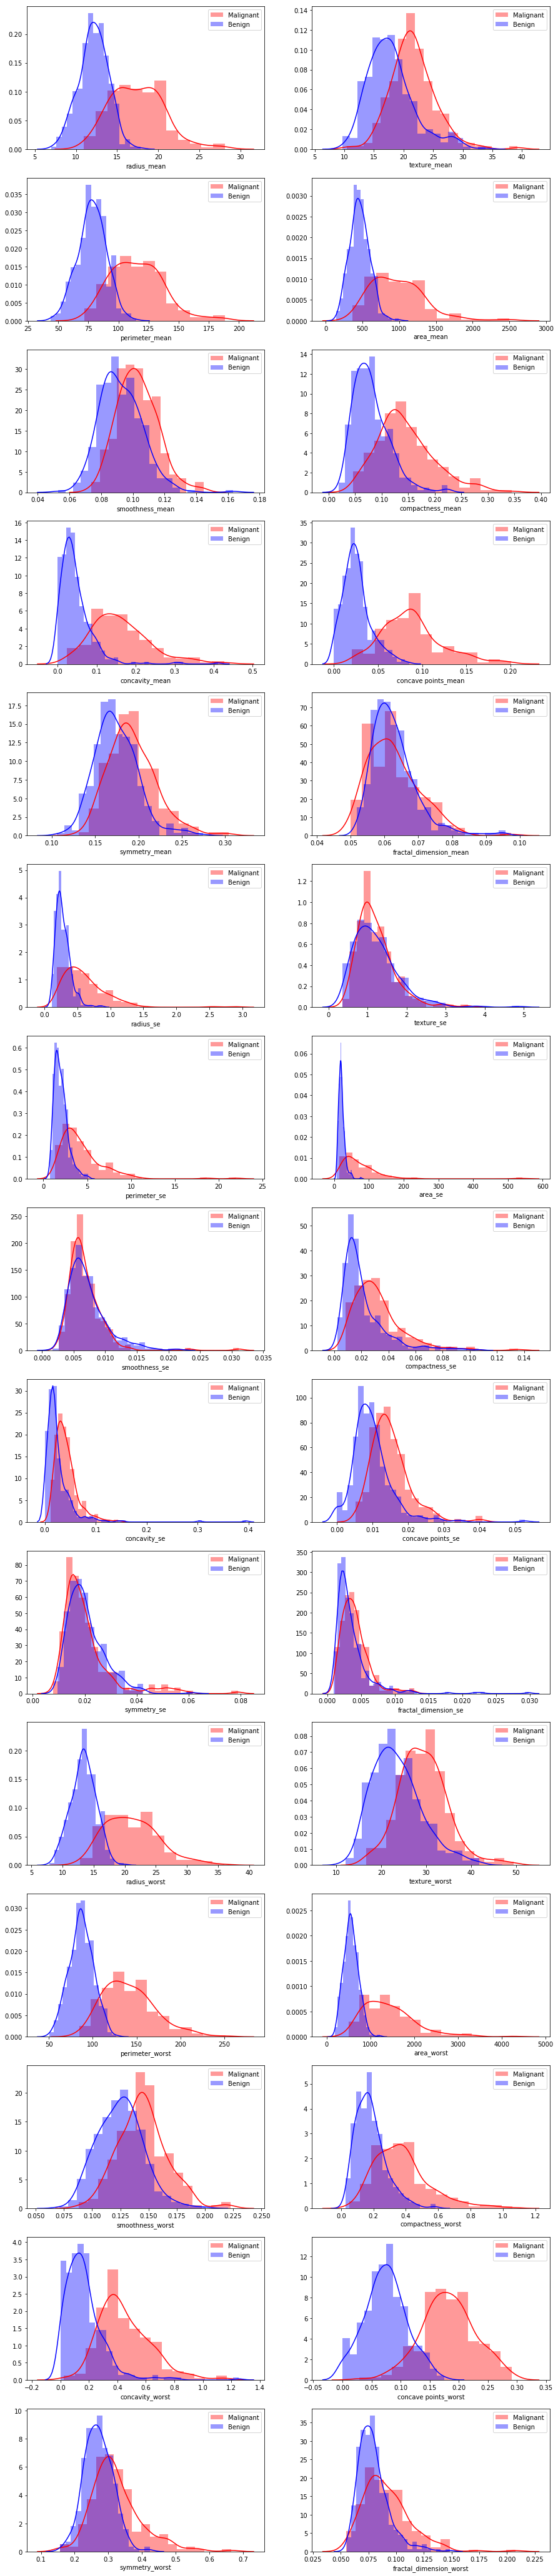

In [5]:
pyplot.figure(figsize=(15, 75))
features_list = list(cancer_dataset.columns[1:])
rows = int(len(features_list) / 2)

for i, feature in enumerate(features_list):    
    pyplot.subplot(rows, 2, i + 1)
    
    seaborn.distplot(cancer_dataset[cancer_dataset['diagnosis'] == True][feature], 
                     color='red', label='Malignant');
    seaborn.distplot(cancer_dataset[cancer_dataset['diagnosis'] == False][feature], 
                     color='blue', label='Benign');
    pyplot.legend(loc='upper right')

pyplot.show()

In [6]:
labels = cancer_dataset['diagnosis']
cancer_dataset.drop(['diagnosis'], axis=1, inplace=True)

In [7]:
train_values, test_values, train_labels, test_labels = \
train_test_split(cancer_dataset, labels, stratify=labels, random_state=17)

In [8]:
logistic_clasifier = LogisticRegression()
logistic_clasifier.fit(train_values, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
print("Accuracy of logistic regression on training set: {:.3f}"\
      .format(logistic_clasifier.score(train_values, train_labels)))
print("Accuracy of logistic regression on test set: {:.3f}"\
      .format(logistic_clasifier.score(test_values, test_labels)))

Accuracy of logistic regression on training set: 0.958
Accuracy of logistic regression on test set: 0.944


In [10]:
from sklearn.model_selection import GridSearchCV

In [11]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 50, 100]}
cross_valid = GridSearchCV(logistic_clasifier, param_grid, cv=5, scoring='accuracy')

In [12]:
cross_valid.fit(train_values, train_labels);

In [13]:
print('Best parameter for logistic classifier: {parameter}.\n\
Highest score on cross validation: {score:.3f}'.format(parameter=cross_valid.best_params_['C'], 
                                                score=cross_valid.best_score_))

Best parameter for logistic classifier: 100.
Highest score on cross validation: 0.951


In [14]:
cross_valid_results = pandas.DataFrame(cross_valid.cv_results_)
cross_valid_represent_train = cross_valid_results.loc[0:, ['param_C', 'mean_train_score']]
cross_valid_represent_train

,param_C,mean_train_score
0,0.001,0.934274
1,0.01,0.941906
2,0.1,0.950705
3,1,0.957166
4,10,0.970076
5,50,0.973014
6,100,0.974187


In [15]:
cross_valid_represent_test = cross_valid_results.loc[0:, ['param_C', 'mean_test_score']]
cross_valid_represent_test

,param_C,mean_test_score
0,0.001,0.931925
1,0.01,0.938967
2,0.1,0.938967
3,1,0.946009
4,10,0.948357
5,50,0.948357
6,100,0.950704


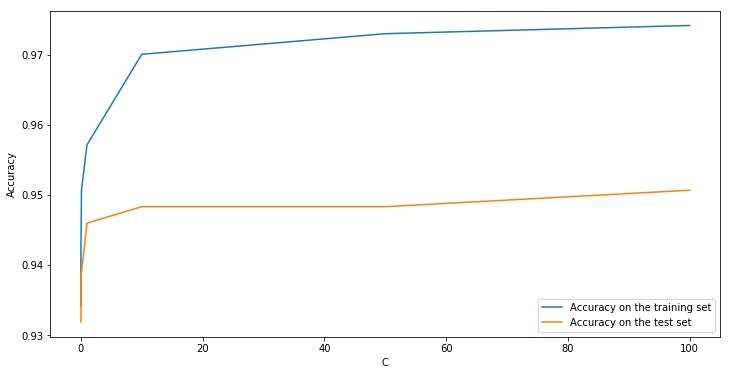

In [16]:
pyplot.figure(figsize=(12, 6))

pyplot.plot(param_grid['C'], cross_valid_represent_train['mean_train_score'], 
            label='Accuracy on the training set')
pyplot.plot(param_grid['C'], cross_valid_represent_test['mean_test_score'], 
            label='Accuracy on the test set')

pyplot.ylabel('Accuracy')
pyplot.xlabel('C')
pyplot.legend();

In [17]:
logistic_clasifier = cross_valid.best_estimator_

from sklearn.metrics import accuracy_score
print("Accuracy of tuned logistic regression on test set: {:.3f}" \
      .format(accuracy_score(test_labels, logistic_clasifier.predict(test_values))))

Accuracy of tuned logistic regression on test set: 0.958
